<a href="https://colab.research.google.com/github/SheenaMathew19/Course/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Bank Telemarketing Campaign Case Study.

In this case study you’ll be learning Exploratory Data Analytics with the help of a case study on "Bank marketing campaign". This will enable you to understand why EDA is a most important step in the process of Machine Learning.


#### Problem Statement:



The bank provides financial services/products such as savings accounts, current accounts, debit cards, etc. to its customers. In order to increase its overall revenue, the bank conducts various marketing campaigns for its financial products such as credit cards, term deposits, loans, etc. These campaigns are intended for the bank’s existing customers. However, the marketing campaigns need to be cost-efficient so that the bank not only increases their overall revenues but also the total profit. You need to apply your knowledge of EDA on the given dataset to analyse the patterns and provide inferences/solutions for the future marketing campaign.

The bank conducted a telemarketing campaign for one of its financial products ‘Term Deposits’ to help foster long-term relationships with existing customers. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts.


**What is the term Deposit?**

Term deposits also called fixed deposits, are the cash investments made for a specific time period ranging from 1 month to 5 years for predetermined fixed interest rates. The fixed interest rates offered for term deposits are higher than the regular interest rates for savings accounts. The customers receive the total amount (investment plus the interest) at the end of the maturity period. Also, the money can only be withdrawn at the end of the maturity period. Withdrawing money before that will result in an added penalty associated, and the customer will not receive any interest returns.

Your target is to do end to end EDA on this bank telemarketing campaign data set to infer knowledge that where bank has to put more effort to improve it's positive response rate.

#### Importing the libraries.

In [48]:
import warnings
warnings.filterwarnings("ignore")

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Session- 2, Data Cleaning

There are multiple types of data types available in the data set. some of them are numerical type and some of categorical type. You are required to get the idea about the data types after reading the data frame.

Following are the some of the types of variables:
- **Numeric data type**: banking dataset: salary, balance, duration and age.
- **Categorical data type**: banking dataset: education, job, marital, poutcome and month etc.
- **Ordinal data type**: banking dataset: Age group.
- **Time and date type**
- **Coordinates type of data**: latitude and longitude type.

In [50]:
#read the data set of "bank telemarketing campaign" in inp0.
inp0= pd.read_csv("bank_marketing_updated_v1.csv")
inp0.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


### Segment- 3, Fixing the Rows and Columns

Checklist for fixing rows:
- **Delete summary rows**: Total and Subtotal rows
- **Delete incorrect rows**: Header row and footer row
- **Delete extra rows**: Column number, indicators, Blank rows, Page No.

Checklist for fixing columns:
- **Merge columns for creating unique identifiers**, if needed, for example, merge the columns State and City into the column Full address.
- **Split columns to get more data**: Split the Address column to get State and City columns to analyse each separately.
- **Add column names**: Add column names if missing.
- **Rename columns consistently**: Abbreviations, encoded columns.
- **Delete columns**: Delete unnecessary columns.
- **Align misaligned columns**: The data set may have shifted columns, which you need to align correctly.


#### Read the file without unnecessary headers.

In [51]:
#read the file in inp0 without first two rows as it is of no use.
inp0=pd.read_csv("bank_marketing_updated_v1.csv",skiprows=2)
inp0.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [52]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

In [53]:
# dropping customer id column
inp0.drop("customerid",axis=1,inplace=True)

In [54]:
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


#### Dividing "jobedu" column into job and education categories.

In [55]:
#Extract job in newly created 'job' column from "jobedu" column.


In [56]:
inp0["job"]=inp0.jobedu.apply(lambda x:x.split(",")[0])
inp0["education"]=inp0.jobedu.apply(lambda x:x.split(",")[1])
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [57]:
inp0.drop("jobedu",axis=1,inplace=True)

In [58]:
inp0.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


### Segment- 4, Impute/Remove missing values
Take aways from the lecture on missing values:

- **Set values as missing values**: Identify values that indicate missing data, for example, treat blank strings, "NA", "XX", "999", etc., as missing.
- **Adding is good, exaggerating is bad**: You should try to get information from reliable external sources as much as possible, but if you can’t, then it is better to retain missing values rather than exaggerating the existing rows/columns.
- **Delete rows and columns**: Rows can be deleted if the number of missing values is insignificant, as this would not impact the overall analysis results. Columns can be removed if the missing values are quite significant in number.
- **Fill partial missing values using business judgement**: Such values include missing time zone, century, etc. These values can be identified easily.

Types of missing values:
- **MCAR**: It stands for Missing completely at random (the reason behind the missing value is not dependent on any other feature).
- **MAR**: It stands for Missing at random (the reason behind the missing value may be associated with some other features).
- **MNAR**: It stands for Missing not at random (there is a specific reason behind the missing value).

#### handling missing values in age column.

In [59]:
inp0.isnull().sum()

,0
age,20
salary,0
balance,0
marital,0
targeted,0
default,0
housing,0
loan,0
contact,0
day,0


In [60]:
inp1=inp0[~inp0["age"].isnull()].copy()
inp1.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [61]:
#### handling missing values in month column

In [62]:
inp1.month.isnull().sum()

np.int64(50)

In [63]:
inp1.month.value_counts(normalize=True)

,proportion
month,
"may, 2017",0.304380
"jul, 2017",0.152522
"aug, 2017",0.138123
"jun, 2017",0.118141
"nov, 2017",0.087880
"apr, 2017",0.064908
"feb, 2017",0.058616
"jan, 2017",0.031058
"oct, 2017",0.016327


In [64]:
month_mode=inp1.month.mode()[0]
month_mode

'may, 2017'

In [65]:
inp1.month.fillna(month_mode,inplace=True)
inp1.value_counts(normalize=True)

age   salary  balance  marital   targeted  default  housing  loan  contact    day  month      duration              campaign  pdays  previous  poutcome  response  job      education
95.0  55000   2282     divorced  yes       no       no       no    telephone  21   apr, 2017  3.45 min              17        -1     0         unknown   yes       retired  primary      0.000022
18.0  4000    3        single    no        no       no       no    cellular   25   aug, 2017  2.16666666666667 min  2         -1     0         unknown   yes       student  unknown      0.000022
              5        single    yes       no       no       no    cellular   24   aug, 2017  2.38333333333333 min  2         -1     0         unknown   no        student  secondary    0.000022
              35       single    no        no       no       no    telephone  21   aug, 2017  1.73333333333333 min  2         -1     0         unknown   no        student  unknown      0.000022
              108      single    no        no       no       no    cellular   8    sep, 2017  2.81666666666667 min  1         -1     0         unknown   yes       student  unknown      0.000022
                                                                                                                                                                                           ...   
19.0  4000    0        single    yes       no       no       no    cellular   4    may, 2017  1.2 min               4         -1     0         unknown   no        student  primary      0.000022
                                 no        no       no       no    cellular   11   feb, 2017  2.05 min              3         -1     0         unknown   no        student  unknown      0.000022
18.0  4000    1944     single    yes       no       no       no    telephone  10   aug, 2017  2.03333333333333 min  3         -1     0         unknown   no        student  primary      0.000022
              608      single    yes       no       no       no    cellular   13   nov, 2017  3.5 min               1          93    1         success   yes       student  primary      0.000022
                                                                              12   aug, 2017  4.45 min              1         -1     0         unknown   yes       student  primary      0.000022
Name: proportion, Length: 45161, dtype: float64

-1 indicates the missing values.
Missing value does not always be present as null.
How to handle it:

Objective is:
- you should ignore the missing values in the calculations
- simply make it missing - replace -1 with NaN.
- all summary statistics- mean, median etc. we will ignore the missing values of pdays.

In [66]:
inp1.pdays.describe()

,pdays
count,45191.000000
mean,40.181253
std,100.074099
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,871.000000


inp1.pdays < 0 → finds all rows where the column pdays has negative values.

.loc[condition, "pdays"] → selects the pdays column for only those rows.

= np.nan → replaces those values with NaN (missing value).

In [67]:
inp1.loc[inp1.pdays<0,"pdays"]=np.nan
inp1.pdays.describe()

,pdays
count,8252.000000
mean,224.523752
std,115.202715
min,1.000000
25%,133.000000
50%,194.500000
75%,327.000000
max,871.000000


Sometimes, it is good to just drop the missing values because they are missing completely at random.

Sometimes, it is good to impute them with another value, maybe mean/median/mode, because they are not missing at random and have to be incorporated for further analysis.



You have learnt what missing values are and how to treat them. Now, let’s move to the next concept of data cleaning, which is outliers.




The definition of outliers is as follows:

Outliers are values that are much beyond or far from the next nearest data points.




In this video, Mr. Rahim will help you understand the concept of outliers.

### Segment- 5, Handling Outliers
Major approaches to the treat outliers:

- **Imputation**
- **Deletion of outliers**
- **Binning of values**
- **Cap the outlier**


In [68]:
inp1.age.describe()

,age
count,45191.000000
mean,40.935651
std,10.619198
min,18.000000
25%,33.000000
50%,39.000000
75%,48.000000
max,95.000000


count = 45191 → There are 45,191 non-missing age values.

mean = 40.93 → The average age is ~41 years.

std = 10.62 → Standard deviation → most people are within ~10 years of the mean (i.e., between 30 and 51).

min = 18 → Youngest is 18.

25% (Q1) = 33 → 25% of people are younger than 33.

50% (Median) = 39 → Half the people are younger than 39, half are older.

75% (Q3) = 48 → 25% of people are older than 48.

max = 95 → Oldest is 95.

<Axes: ylabel='Frequency'>

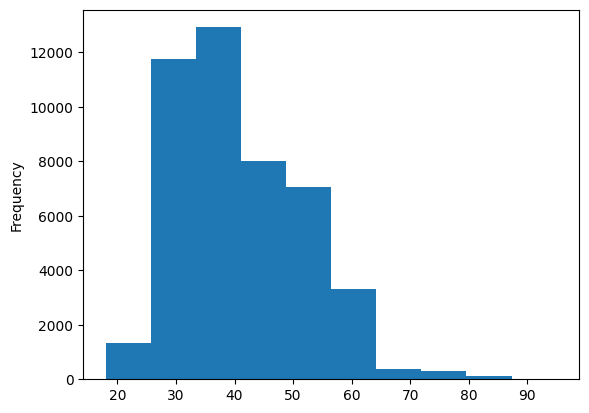

In [69]:
inp1.age.plot.hist()

<Axes: ylabel='age'>

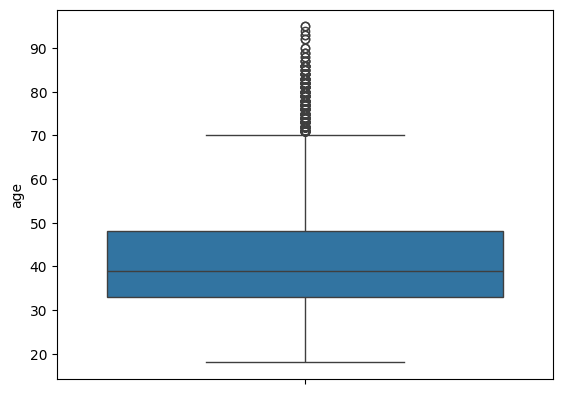

In [70]:
sns.boxplot(inp1.age)

|----- whisker -----| [25% data in box] Median [25% data in box] |----- whisker -----|
   Outliers shown as dots beyond whiskers
Box → middle 50% of data (Q1 to Q3, called the interquartile range IQR).

Line inside box → median.

Whiskers → extend to 1.5 × IQR from Q1 and Q3.

Points beyond whiskers → outliers.

How it’s used

Spread of data → Larger IQR means more variability in the middle 50%.

Detecting outliers

Rule of thumb:

Lower bound = Q1 – 1.5 × IQR

Upper bound = Q3 + 1.5 × IQR

Any value outside this range is considered an outlier

IQR=Q3−Q1

#### Balance variable

In [71]:
inp1.balance.describe()

,balance
count,45191.000000
mean,1362.432520
std,3045.120417
min,-8019.000000
25%,72.000000
50%,448.000000
75%,1428.000000
max,102127.000000


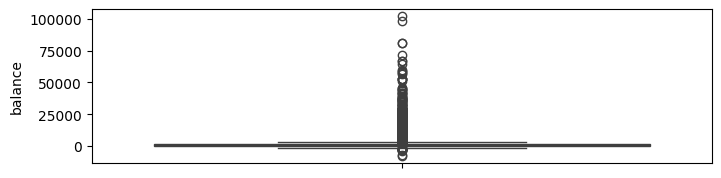

In [72]:
plt.figure(figsize=[8,2])
sns.boxplot(inp1.balance)
plt.show()

In [73]:
inp1.balance.quantile([0.5,0.7,0.9,0.95,0.99])

,balance
0.50,448.0
0.70,1126.0
0.90,3575.0
0.95,5768.0
0.99,13167.1


In [74]:
inp1[inp1.balance>15000].describe()

,age,salary,balance,day,campaign,pdays,previous
count,351.000000,351.000000,351.000000,351.000000,351.000000,62.000000,351.000000
mean,45.341880,70008.547009,24295.780627,16.022792,2.749288,188.516129,0.555556
std,12.114333,34378.272805,12128.560693,8.101819,3.036886,118.796388,1.784590
min,23.000000,0.000000,15030.000000,1.000000,1.000000,31.000000,0.000000
25%,35.000000,50000.000000,17074.000000,9.000000,1.000000,96.250000,0.000000
50%,44.000000,60000.000000,20723.000000,18.000000,2.000000,167.500000,0.000000
75%,55.000000,100000.000000,26254.000000,21.000000,3.000000,246.500000,0.000000
max,84.000000,120000.000000,102127.000000,31.000000,31.000000,589.000000,23.000000


### Segment- 6, Standardising values

Checklist for data standardization exercises:
- **Standardise units**: Ensure all observations under one variable are expressed in a common and consistent unit, e.g., convert lbs to kg, miles/hr to km/hr, etc.
- **Scale values if required**: Make sure all the observations under one variable have a common scale.
- **Standardise precision** for better presentation of data, e.g., change 4.5312341 kg to 4.53 kg.
- **Remove extra characters** such as common prefixes/suffixes, leading/trailing/multiple spaces, etc. These are irrelevant to analysis.
- **Standardise case**: String variables may take various casing styles, e.g., UPPERCASE, lowercase, Title Case, Sentence case, etc.
- **Standardise format**: It is important to standardise the format of other elements such as date, name, etce.g., change 23/10/16 to 2016/10/23, “Modi, Narendra” to “Narendra Modi", etc.

In [75]:
inp1.duration.head()

,duration
0,261 sec
1,151 sec
2,76 sec
3,92 sec
4,198 sec


In [76]:
inp1.duration.describe()

,duration
count,45191
unique,2646
top,1.5 min
freq,138


In [77]:
inp1["duration"] = inp1["duration"].apply(
    lambda x: float(x.split()[0]) / 60 if isinstance(x, str) and x.find("sec") >= 0
    else (float(x.split()[0]) if isinstance(x, str) else x)
)
inp1.duration.describe

<bound method NDFrame.describe of 0         4.350000
1         2.516667
2         1.266667
3         1.533333
4         3.300000
           ...    
45206    16.283333
45207     7.600000
45208    18.783333
45209     8.466667
45210     6.016667
Name: duration, Length: 45191, dtype: float64>

Encode unicode properly: In case the data is being read as junk characters, try to change the encoding, for example, use CP1252 instead of UTF-8.

Convert incorrect data types: Change the incorrect data types to the correct data types for ease of analysis. For example, if numeric values are stored as strings, then it would not be possible to calculate metrics such as mean, median, etc. Some of the common data type corrections include changing a string to a number ("12,300" to “12300”), a string to a date ("2013-Aug" to “2013/08”), a number to a string (“PIN Code 110001” to "110001"), etc.

Correct the values that lie beyond the range: If some values lie beyond the logical range, for example, temperature less than -273° C (0° K), then you would need to correct those values as required. A close look at the data set would help you determine whether there is scope for correction or the value needs to be removed.

Correct the values not belonging in the list: Remove the values that do not belong to a list. For example, in a data set of blood groups of individuals, strings ‘E’ or ‘F’ are invalid values and can be removed.

Fix incorrect structure: Values that don’t follow a defined structure can be removed from a data set. For example, in a data set containing the pin codes of Indian cities, a pin code of 12 digits would be an invalid value and would need to be removed. Similarly, a phone number of 12 digits would be an invalid value.

Validate internal rules: Internal rules, if present, should be correct and consistent. For example, the date of a product’s delivery should definitely come after the date of purchase.

Deduplicate data: Remove identical rows and the rows in which some columns are identical.
Filter rows: Filter rows by segment and date period to obtain only rows relevant to the analysis.
Filter columns: Filter columns relevant to the analysis.
Aggregate data: Group by the required keys and aggregate the rest.
